### 트랜스포머의 잠재적 문제점

규모가 매우 크다
- 갈력한 모델을 학습시키는데, 많은 비용이 들어간다. 이런 비용을 충당할 수 없는 기관은 연구 범위가 제한될 수 밖에 없다.
- 대량의 저력소모로 환경적 문제가 있다.
- 오픈소스로 모델이 제공되어도 추론 하는데에만 많은 gpu가 필요할 수 있다.

순차 처리
- 결국 첫 토큰 부터 마지막 토큰까지 순서대로 처리하는 것이기 때문에, 순차 처리로 인해 입력 길이에 대해 2차 시간 복잡도를 가지는 문제가 있다.
- 이는 처리 시간이 입력 길이의 제고벵 비례해 증가한다.

고정 입력 크기
- 모델이 처리 할 수 있는 최대 토큰 수가 정해져 있다. 이는 모델 규모에 따라 정해져 있어, 추후 늘리거나 할 수 없다.
- 모델이 처리 할 수 있는 토큰의 수는 컨텐스트 윈도우 에 따라 다르다.

이해하기 어려움
- 트랜스포머는 블랙박스다. 입력에 어떤 조작을 가해서 출력으로 내뱉는지 완벽하게 알지 못한다.

### 활용 범위 - VIT

- 최근 다양한 분야에 트랜스포머 기법이 활용되고 있다. 특히 이미지 분야에서의 활용성도 뛰어나다. 이미지 인식부터, 분할, 객체 감지, 비디오 이해 등 여러 분야에 활용되고 있다.
- 비전 트랜스포머 (vision transformer *VIT)의 도입으로 어텐션과 트랜스포머 기반 기술을 사용해 비전 문제를 해결해 나가고 있지만 CNN(convolutional neural network)를 완전히 배제하지는 않는다.
- 이미지 처리 파이프라인에서 합성곱 신경망은 높은 수준의 엣지, 텍스터 및 기타 패턴을 감지하는 feature map을 추출한다. 이는 겹치지 않는 고정 크기의 patch로 나뉘고 이는 토큰 시퀀스와 유사하다.
- 트랜스포머는 이 feature map patch간의 관계를 학습할 수 있다.



- VIT는 CNN보다 학습에 매우 많은 데이터를 필요로 한다. 예로, DeiT(data-efficient image transformer) 모델은 CNN에서 일반적으로 사용되는 augmentation(증강)과 regularization(정규화) 기법을 활용해 학습을 진행했다.
- 제로샷 이미지 분류는 트랜스포머 기반 이미지 모델의 대표적인 예다. 기존의 이미지 분류 모델은 고정된 클래스 집합으로 학습되지만, 제로샷 이미지 분류는 추론 시점에 클래스를 지정할 수 있다.

In [ ]:
# 이미지를 뭐 어디서든 불러오기
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import os

cache_dir = r"D:\WorkSpace\Hands_on_Gen_AI"
os.makedirs(cache_dir, exist_ok=True)

# model_id = "distilbert/distilbert-base-uncased-finetuned-sst-2-english"
# tok = AutoTokenizer.from_pretrained(model_id, cache_dir=cache_dir)
# mdl = AutoModelForSequenceClassification.from_pretrained(model_id, cache_dir=cache_dir)

# classifier = pipeline("text-classification", model=mdl, tokenizer=tok)
# print(classifier("I absolutely love this movie!"))

image = "load some image"

pipe = pipeline("zerp-shot-image-classification", model = "openai/clip-vit-base-patch32")
labels = ['cat','dog','zebra','rion']
pipe(image, cadidate_labels=labels )
image

### 연습문제 1

- 지금까지 사용했던 모듈을 직접 구현 해본다.
model.generate() 를 사용하지 않고 직접 시퀀스를 구성한다.

In [44]:
from transformers import AutoTokenizer,AutoModelForCausalLM
import torch.nn.functional as F
import torch

prompt = "It was a dark and stormy"
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2-0.5B")
Qwen2 = AutoModelForCausalLM.from_pretrained("Qwen/Qwen2-0.5B")
input_ids = tokenizer(prompt, return_tensors="pt").input_ids


In [45]:
current_length = input_ids.size(1)
current_length

7

In [46]:
outputs = Qwen2(input_ids)
outputs

CausalLMOutputWithPast(loss=None, logits=tensor([[[ 9.0283,  6.4773,  3.8585,  ..., -4.3873, -4.3869, -4.3874],
         [ 5.0396,  5.2072,  1.8779,  ..., -5.4419, -5.4425, -5.4426],
         [ 2.7506,  4.8974, -0.5766,  ..., -5.5188, -5.5188, -5.5189],
         ...,
         [ 4.2731,  5.7324, -0.9108,  ..., -5.5750, -5.5747, -5.5756],
         [ 4.7102,  3.7237, -0.0393,  ..., -5.8334, -5.8342, -5.8342],
         [ 3.5512,  4.9842, -1.4630,  ..., -7.0129, -7.0131, -7.0135]]],
       grad_fn=<UnsafeViewBackward0>), past_key_values=DynamicCache(layers=[DynamicLayer, DynamicLayer, DynamicLayer, DynamicLayer, DynamicLayer, DynamicLayer, DynamicLayer, DynamicLayer, DynamicLayer, DynamicLayer, DynamicLayer, DynamicLayer, DynamicLayer, DynamicLayer, DynamicLayer, DynamicLayer, DynamicLayer, DynamicLayer, DynamicLayer, DynamicLayer, DynamicLayer, DynamicLayer, DynamicLayer, DynamicLayer]), hidden_states=None, attentions=None)

In [47]:
outputs.logits.shape

torch.Size([1, 7, 151936])

- 출력의 첫 번째 차원은 배치 크기를 나타내고 우리는 한 문장만 전달 했기에 그 크기는 1입니다.
- 두 번째 차원은 문장의 길이, 입력 문장의 토큰 수를 나타냅니다. 토크나이저마다 문장을 slice하는 기준이 다르기에 그 값은 같은 문장이라도 조금씩 다를 수 있습니다.
- 세 번째 차원은 어휘 사전 크기를 나타냅니다.
- 이러한 값들은 어휘 사전의 토큰에 대응하는 모델의 초기 출력 값인 logit으로 [0.1, -2.1, 1.2, 0.01 ...] 같은 숫자 리스트입니다. 이 logit을 사용해 다음 이어질 확률이 가장 높은 토큰을 선택할 수 있고 logit을 확률로 변환하는 방법도 있습니다.

In [48]:
outputs.logits[:, -1, :].shape

torch.Size([1, 151936])

outputs.logits의 형태는 보통 (batch_size, seq_len, vocab_size)입니다. 각 시퀀스의 각 위치에서 다음 토큰에 대한 점수(로짓, 정규화 전 점수)를 제공합니다.

따라서 outputs.logits[:, -1, :]은 마지막 입력 토큰까지를 조건으로 했을 때 다음에 올 토큰(시퀀스의 seq_len번째 위치)에 대한 전체 어휘(vocab) 로짓 분포이며, 텐서 형태는 (batch_size, vocab_size)입니다.

이 로짓에 softmax(dim=-1)를 적용하면 다음 토큰 확률 분포가 되고, argmax(dim=-1)로는 그리디하게 다음 토큰 인덱스를 선택할 수 있습니다.

더 정확히 (인과적 LM에서) 위치 t의 출력은 다음을 예측합니다:
$$𝑝(𝑥𝑡+1∣𝑥≤𝑡)$$

그래서 학습 시에는 logits[:, :-1, :]와 labels[:, 1:]를 맞춰(레이블을 오른쪽으로 한 칸 시프트) 손실을 계산합니다.

캐시(past_key_values) 사용 여부와 무관하게, 마지막 시퀀스 위치의 로짓을 고르면 현재 프롬프트 뒤에 올 다음 토큰의 분포를 보게 됩니다.

어휘는 단어가 아니라 토크나이저(BPE/SentencePiece 등)의 토큰 단위이며, 특수 토큰(EOS 등)도 포함될 수 있습니다.

In [49]:
next_token_logits = outputs.logits[:, -1, :]
top_k_logits, _ = torch.topk(next_token_logits, 10)
print(top_k_logits) # 어휘 사전 토큰 점수
print(_) # 어휘 사전 토큰 ID

tensor([[17.3635, 14.3368, 13.6628, 12.1578, 12.0783, 11.5770, 11.4987, 11.2027,
         11.1147, 11.0757]], grad_fn=<TopkBackward0>)
tensor([[ 3729, 11458,  1899,  6556, 12406, 13354,  7728,  7270,  6602,  6527]])


In [50]:
min_top_k_value = top_k_logits[:, -1].unsqueeze(-1)
min_top_k_value

tensor([[11.0757]], grad_fn=<UnsqueezeBackward0>)

In [51]:
next_token_logits = torch.where(
    next_token_logits < min_top_k_value,
    torch.tensor(float("-inf")),
    next_token_logits,
)
probs = F.softmax(next_token_logits, dim=-1)
probs

tensor([[0., 0., 0.,  ..., 0., 0., 0.]], grad_fn=<SoftmaxBackward0>)

In [52]:
next_token_id = torch.multinomial(probs, num_samples=1)
next_token_id

tensor([[3729]])

In [57]:
from transformers import AutoTokenizer,AutoModelForCausalLM
import torch.nn.functional as F
import torch

prompt = "It was a dark and stormy"
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2-0.5B")
Qwen2 = AutoModelForCausalLM.from_pretrained("Qwen/Qwen2-0.5B")
input_ids = tokenizer(prompt, return_tensors="pt").input_ids

def generate(model, tokenizer, input_ids, max_length=50, do_sample=False,top_k = None):
    '''
    Args:
        model : 생성에 사용할 모델, 
        tokenaizer : 생성에 사용할 토크나이저, 
        input_ids : 입력 ID, 
        max_length=50 : 시퀀스 최대 길이, 
        do_sample=False : 샘플링 사용 여부,
        top_k = None : 샘플링할 토큰 수
    '''
    current_length = input_ids.size(1)  # 현재 입력된 input token 의 길이 확인

    for _ in range(max_length - current_length): # 최대 시퀀스 길이에서 이미 입력된 길이 만큼 빼고 진행
        # 모델에 입력 시퀀스 입력
        outputs = model(input_ids)

        # 현재 입력 다음에 올 토큰에 대한 vocab 전체의 로짓(점수) 목록 (batch_size, vocab_size)
        next_token_logits = outputs.logits[:, -1, :]

        if do_sample:
            if top_k > 0:
                # 상위 top_k 개 샘플링
                # 상위 top_k개의 다음 토큰 점수와 토큰 ID 목록
                top_k_logits, _ = torch.topk(next_token_logits, top_k)

                # top_k 개 중 가장  점수가 낮은 토큰
                min_top_k_value = top_k_logits[:, -1].unsqueeze(-1)

                # 상위 top_k개 중 가장 낮은 토큰 보다 점수가 낮은 토큰은 -inf 로 마스킹.
                next_token_logits = torch.where(
                    next_token_logits < min_top_k_value,
                    torch.tensor(float("-inf")),
                    next_token_logits,
                )

            # softmax 적용해서 확률로 변환
            probs = F.softmax(next_token_logits, dim=-1)
            # 각 토큰 별 확률 기반 샘플링
            next_token_id = torch.multinomial(probs, num_samples=1)
        else:
            # 가장 점수가 높은 토큰 뽑기
            next_token_id = torch.argmax(
                next_token_logits, dim=-1, keepdim=True
            )

        # 입력 시퀀스에 다음 예측 토큰 이어 붙이기
        input_ids = torch.cat([input_ids, next_token_id], dim=-1)

        # 문장 끝 토큰 ID가 나오면 중단
        if next_token_id == tokenizer.eos_token_id:
            break
    # 토크나이저 디코딩으로 합쳐진 시퀀스 출력
    return tokenizer.decode(input_ids.squeeze(), skip_special_tokens=True)

In [58]:
generate(model = Qwen2, tokenizer = tokenizer,  input_ids = input_ids,max_length=60, do_sample=True, top_k=10)

'It was a dark and stormy night. It was the end of a long, hard day, and it was the first in a long week of being a mother and a writer. I had come home from a long, hard day at work. It wasn’t really a hard day at work.'

### 연습문제 2

1. **텍스트 생성에서 어텐션 메커니즘의 역할은 무엇인가요?**

   어텐션 메커니즘은 출력 시퀀스의 각 토큰을 생성할 때 입력 시퀀스의 서로 다른 부분에 **선택적으로 집중**할 수 있게 해 줍니다. 이를 통해 단어들 사이의 **장거리 의존성**과 관계를 더 잘 포착합니다.

2. **어떤 경우에 문자 기반 토크나이저(character-based tokenizer)를 선호하나요?**

   문자, 기호, 이모지처럼 **개별 문자 자체가 의미를 가지는** 언어/도메인에서 유리합니다. 예를 들어 중국어는 한 글자에 담긴 정보량이 라틴 문자 언어의 한 글자보다 많은 편입니다.

3. **모델이 사용한 것과 다른 토크나이저를 쓰면 어떻게 되나요?**

   토크나이저가 다르면 **토크나이즈 불일치**가 발생해 토큰 경계가 어긋납니다. 그 결과 모델 입력/출력이 뒤틀려 **예상치 못한 결과**가 나올 수 있습니다.

4. **생성 시 `no_repeat_ngram_size`를 사용하면 어떤 위험이 있나요? (힌트: 도시 이름을 떠올려 보세요.)**

   예를 들어 `no_repeat_ngram_size=3`이면 **동일한 3-그램**은 한 번만 등장할 수 있습니다. 따라서 `"New York City"`라는 3-그램은 **한 번만** 생성됩니다. 뉴욕을 배경으로 이야기를 생성한다면 이런 제약은 **품질을 심각하게 떨어뜨릴** 수 있습니다.

5. **빔 서치(Beam Search)와 샘플링을 함께 쓰면 어떻게 되나요?**

   빔 서치는 매 시점마다 점수가 높은 **상위 k개 시퀀스(빔)**를 유지합니다. 여기에 **확률적 요소(샘플링)**를 더해, 점수 상위 후보에서 확률적으로 다음 토큰을 뽑습니다.
   이렇게 하면 빔 서치의 **반복성**을 줄이고, 순수 샘플링의 **예측 불가능성**을 완화해 **다양성과 품질의 균형**을 얻을 수 있습니다. 다만 유지·샘플링해야 하는 시퀀스가 늘어 **계산 비용**이 커질 수 있습니다.

6. **샘플링으로 코드 에디터에서 코드를 생성하는 LLM을 쓴다고 합시다. 낮은 온도(temperature)와 높은 온도 중 무엇이 더 편리할까요?**

   일반적으로 **낮은 온도**가 더 편리합니다. 더 **결정론적이고 보수적인** 코드를 만들어 관용구를 잘 따르고 오류 위험을 줄입니다. 반대로 높은 온도는 무작위성이 커져 **비정형적이거나 덜 신뢰할 수 있는** 코드가 나올 수 있습니다.

7. **파인튜닝의 중요성과, 제로샷(Zero-shot) 생성과의 차이는 무엇인가요?**

   파인튜닝은 사전학습된 언어 모델을 **특정 작업/도메인에 맞게 적응**시키는 과정으로, 작업 고유의 뉘앙스를 학습해 **목표 성능을 끌어올립니다**. 반면 제로샷 생성은 **작업별 추가 학습 없이** 바로 모델을 사용하는 것입니다.

8. **인코더(Encoder), 디코더(Decoder), 인코더-디코더(Encoder-Decoder) 트랜스포머의 차이와 활용을 설명하세요.**

   * **인코더:** 입력 시퀀스를 처리해 **의미 표현**을 추출. 분류, 감성 분석, 문서 임베딩 등에 사용. 예: **BERT, RoBERTa**
   * **디코더:** 주어진 조건을 바탕으로 **출력 시퀀스를 생성**. 텍스트 생성에 사용. 예: **GPT-2, (디코더로 동작하는) T5**
   * **인코더-디코더:** 인코더가 입력을 표현으로 바꾸고, 디코더가 이를 이용해 출력을 생성하는 **시퀀스-투-시퀀스** 구조. 기계 번역, 요약, 질의응답 등에 적합. 예: **BART, T5**


### 연습문제 3

1. 요약하기 : 요약 모델을 사용해 단락의 요약을 생성해보자.
2. 감성 분석 : 제로샷 분류의 성능 측정 결과와 비교해 보자. 감성 분석을 할 수 있는 distibert-base-uncased-finetuned-sst-2-english  인코더 모델을 사용해보자
3. 의미 기반 검색 : FAQ 시스템을 만들어 보자. 문장 트랜스포머는 텍스트의 의미적 유사성을 측정할 수 있는 대표적인 모델이다. 트랜스포머 인코더는 일반적으로 각 토큰에 대한 임베딩을 출력하지만 문장 트랜스포머는 전체 입력 텍스트에 대한 임베딩을 출력하여 두 텍스트의 의미가 유사한지 유사도 점수를 기반으로 판단할 수 있다. sentence_transformers 라이브러리를 사용한 간단한 에시를 살펴보자.

#### 1. 요약하기 - 3.Transformer_block.ipynb 파일의 요약하기 자체 실습 코드 발췌

2) 요약 (문서 → 요약 텍스트)

**목표**: 입력을 이해하고 간결하게 재생성

* **모델(권장 순)**

  * 경량/속도: `google/mt5-base` (다중언어(멀티링구얼)), `google/flan-t5-base`
  * 더 높은 질: `google/flan-t5-large` (VRAM 16GB 이상 권장)
* **튜닝**: **LoRA** 혹은 **사전학습된 T5를 프롬프트만으로 사용** (few-shot)
* **인퍼런스 설정**: `num_beams=4`, `no_repeat_ngram_size=3`, `max_new_tokens` 적절 조절

```python
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
import os
cache_dir = r"D:\WorkSpace\Hands_on_Gen_AI"
model_id = "google/flan-t5-base"  # 또는 "google/mt5-base"

tok = AutoTokenizer.from_pretrained(model_id, cache_dir=cache_dir)
mdl = AutoModelForSeq2SeqLM.from_pretrained(model_id, cache_dir=cache_dir)
summarizer = pipeline("summarization", model=mdl, tokenizer=tok)

text = "긴 문서를 여기에 넣으세요..."
print(summarizer(text, max_length=160, min_length=60, do_sample=False))
```

**언제 이 조합?** 비용/지연을 아끼면서 요약 품질이 필요할 때. LLM(디코더형)보다 가볍고 안정적.


In [83]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
import os
cache_dir = r"D:\WorkSpace\Hands_on_Gen_AI"
model_id = "google/flan-t5-base"  # 또는 "google/mt5-base"

tok = AutoTokenizer.from_pretrained(model_id, cache_dir=cache_dir)
mdl = AutoModelForSeq2SeqLM.from_pretrained(model_id, cache_dir=cache_dir)
summarizer = pipeline("summarization", model=mdl, tokenizer=tok)

text =  """
    America has changed dramatically during recent years. Not only has the number of
    graduates in traditional engineering disciplines such as mechanical, civil,
    electrical, chemical, and aeronautical engineering declined, but in most of
    the premier American universities engineering curricula now concentrate on
    and encourage largely the study of engineering science. As a result, there
    are declining offerings in engineering subjects dealing with infrastructure,
    the environment, and related issues, and greater concentration on high
    technology subjects, largely supporting increasingly complex scientific
    developments. While the latter is important, it should not be at the expense
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other
    industrial countries in Europe and Asia, continue to encourage and advance
    the teaching of engineering. Both China and India, respectively, graduate
    six and eight times as many traditional engineers as does the United States.
    Other industrial countries at minimum maintain their output, while America
    suffers an increasingly serious decline in the number of engineering graduates
    and a lack of well-educated engineers.
"""
print(summarizer(text, max_new_tokens=128, min_length=60, do_sample=False))

Device set to use cuda:0


[{'summary_text': 'The number of engineering graduates in the United States has declined dramatically over the past few years, but the number of graduates in traditional engineering disciplines has remained the same in most of the top American universities. China and India, as well as other industrial countries in Europe and Asia, continue to encourage and advance the teaching of engineering. At minimum, America suffers an increasingly serious decline in the number'}]


#### 2. 감성 분석 모델의 기본 결과와  제로샷 요청 후 결과 비교

In [62]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

cache_dir = r"D:\WorkSpace\Hands_on_Gen_AI"
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint, cache_dir=cache_dir)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, cache_dir=cache_dir)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [64]:
input_ids = tokenizer(
    "This movie was terrible!", truncation=True, return_tensors="pt"
).input_ids
classifier_output = model(input_ids)
classifier_output

SequenceClassifierOutput(loss=None, logits=tensor([[ 4.4724, -3.6547]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [65]:
predicted_class_id = classifier_output.logits.argmax().item()
predicted_class_id

0

In [66]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

In [69]:
model.config.id2label[predicted_class_id]

'NEGATIVE'

In [ ]:
def score_with_classifier(sample):
    """Given a review, predict whether it is positive or negative"""
    input_ids = tokenizer(
        sample["text"], truncation=True, return_tensors="pt"
    ).input_ids
    classifier_output = model(input_ids)
    sample["pred"] = classifier_output.logits.argmax().item()

    return sample

In [70]:
score_with_classifier({"text": "This movie was terrible!"})

{'text': 'This movie was terrible!', 'pred': 0}

In [ ]:
from datasets import load_dataset
import evaluate
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

dataset = load_dataset("imdb", cache_dir=cache_dir)["train"]

shuffled_dataset = dataset.shuffle(seed=42)
small_dataset = shuffled_dataset.select(range(1000))

updated_dataset = small_dataset.map(score_with_classifier)
updated_dataset

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label', 'pred'],
    num_rows: 1000
})

In [78]:
confusion_matrix = evaluate.load("confusion_matrix", cache_dir=cache_dir)
cm = confusion_matrix.compute(
    references=updated_dataset["label"],
    predictions=updated_dataset["pred"],
)
cm

{'confusion_matrix': array([[474,  38],
        [ 81, 407]], dtype=int64)}

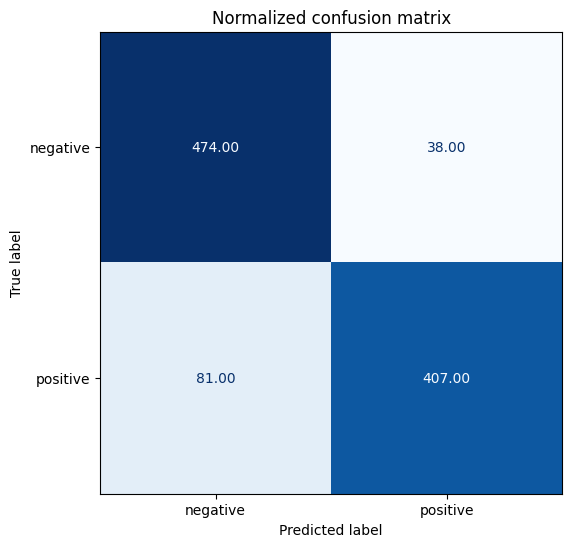

In [79]:
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm["confusion_matrix"],
    display_labels=["negative", "positive"],
)
disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)

plt.title("Normalized confusion matrix")
plt.show()

#### 3. 의미 기반 검색 : FAQ 시스템을 만들어 보자. 

In [84]:
from sentence_transformers import SentenceTransformer, util

sentences = ["I'm happy", "I'm full of happiness"]
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2", cache_folder=cache_dir)

# Compute embedding for both lists
embedding_1 = model.encode(sentences[0], convert_to_tensor=True)
embedding_2 = model.encode(sentences[1], convert_to_tensor=True)

util.pytorch_cos_sim(embedding_1, embedding_2)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

tensor([[0.6003]], device='cuda:0')

In [85]:
# Data from https://faq.ssa.gov/en-US/topic/?id=CAT-01092

faq = {
    "How do I get a replacement Medicare card?": "If your Medicare card was lost, stolen, or destroyed, you can request a replacement online at Medicare.gov.",
    "How do I sign up for Medicare?": "If you already get Social Security benefits, you do not need to sign up for Medicare. We will automatically enroll you in Original Medicare (Part A and Part B) when you become eligible. We will mail you the information a few months before you become eligible.",
    "What are Medicare late enrollment penalties?": "In most cases, if you don’t sign up for Medicare when you’re first eligible, you may have to pay a higher monthly premium. Find more information at https://faq.ssa.gov/en-us/Topic/article/KA-02995",
    "Will my Medicare premiums be higher because of my higher income?": "Some people with higher income may pay a larger percentage of their monthly Medicare Part B and prescription drug costs based on their income. We call the additional amount the income-related monthly adjustment amount.",
    "What is Medicare and who can get it?": "Medicare is a health insurance program for people age 65 or older. Some younger people are eligible for Medicare including people with disabilities, permanent kidney failure and amyotrophic lateral sclerosis (Lou Gehrig’s disease or ALS). Medicare helps with the cost of health care, but it does not cover all medical expenses or the cost of most long-term care.",
}

In [86]:
corpus_embeddings = model.encode(list(faq.values()), convert_to_tensor=True)
print(corpus_embeddings.shape)

torch.Size([5, 384])


In [87]:
user_question = "Do I need to pay more after a raise?"
query_embedding = model.encode(user_question, convert_to_tensor=True)
query_embedding.shape

torch.Size([384])

In [88]:
import numpy as np

similarities = -util.pytorch_cos_sim(query_embedding, corpus_embeddings)[0]
top_3 = similarities.cpu().argsort()[:3]
for i, top_n in enumerate(top_3):
    print(
        f"Top {i+1} question (p={-similarities[top_n]}): {list(faq.keys())[top_n]}"
    )
    print(f"Answer: {list(faq.values())[top_n]}")

Top 1 question (p=0.357962965965271): Will my Medicare premiums be higher because of my higher income?
Answer: Some people with higher income may pay a larger percentage of their monthly Medicare Part B and prescription drug costs based on their income. We call the additional amount the income-related monthly adjustment amount.
Top 2 question (p=0.27877578139305115): What are Medicare late enrollment penalties?
Answer: In most cases, if you don’t sign up for Medicare when you’re first eligible, you may have to pay a higher monthly premium. Find more information at https://faq.ssa.gov/en-us/Topic/article/KA-02995
Top 3 question (p=0.15840469300746918): How do I sign up for Medicare?
Answer: If you already get Social Security benefits, you do not need to sign up for Medicare. We will automatically enroll you in Original Medicare (Part A and Part B) when you become eligible. We will mail you the information a few months before you become eligible.


In [89]:
similarities = util.semantic_search(
    query_embedding, corpus_embeddings, top_k=3
)[0]
for i, result in enumerate(similarities):
    corpus_id = result["corpus_id"]
    score = result["score"]
    print(f"Top {i+1} question (p={score}): {list(faq.keys())[corpus_id]}")
    print(f"Answer: {list(faq.values())[corpus_id]}")

Top 1 question (p=0.357962965965271): Will my Medicare premiums be higher because of my higher income?
Answer: Some people with higher income may pay a larger percentage of their monthly Medicare Part B and prescription drug costs based on their income. We call the additional amount the income-related monthly adjustment amount.
Top 2 question (p=0.27877578139305115): What are Medicare late enrollment penalties?
Answer: In most cases, if you don’t sign up for Medicare when you’re first eligible, you may have to pay a higher monthly premium. Find more information at https://faq.ssa.gov/en-us/Topic/article/KA-02995
Top 3 question (p=0.15840469300746918): How do I sign up for Medicare?
Answer: If you already get Social Security benefits, you do not need to sign up for Medicare. We will automatically enroll you in Original Medicare (Part A and Part B) when you become eligible. We will mail you the information a few months before you become eligible.
